In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('rose-pine-moon')
%matplotlib inline

### Left and Right Inverses

#### Left Inverse

Sources : https://www.youtube.com/watch?v=ANtfgkampyo

For non-singular square matrices we have well defined inverse. But for a m x n matrix, we do not have such concept. Since, only square matrix are supposed to have inverses, we can come up with a tricks to make our non-square matrix into square matrix.<br>
Assume we have a matrix *A* with shape **m x n**, where **m > n and it has full column rank** (this condition will become meanigful after some steps). We know that $A^TA$ will be a square matrix of shape n x n.<br>
So we can express identiy matrix <br><br>
$(A^TA)^{-1}(A^TA) = I$. 
<br><br>Note we cannot expand the *left parentheses* since **inverse of A does not exsist**. But right parthenses are of no  significance. So our new expression becomes:<br> <br>
$[(A^TA)^{-1}A^T]A = I$
<br><br> and the matrix quantities within the square brackets are referred to as "Left inverse". Note that in this case the reverse is not true: <br><br> 
$A [(A^TA)^{-1}A^T] \neq [(A^TA)^{-1}A^T]A$
<br><br>For easier understanding assume $A^TA$ as $C$. So<br><br>
$A [C^{-1}A^T] \neq [C^{-1}A^T]A \neq C^{-1} C$
<br><br> Also note that $C^{-1}$ exsist if $C$ is **full rank**, i.e $A^TA$ is **full rank** or A is **full column rank** (as described before).

In [2]:
A = np.random.randint(1, 10, (3, 2))
A_left_inv = np.linalg.inv(A.T @ A) @ A.T
print(
    f'A :\n{A}',
    f'\n\nLeft inverse (AT.A)^-1 AT :\n{A_left_inv}'
    f'\n\nA_left_inv. A :\n{np.round(A_left_inv @ A, 4)}'
    f'\n\nA . A_left_inv :\n{np.round(A @ A_left_inv, 4)}'
)

A :
[[7 9]
 [9 6]
 [5 5]] 

Left inverse (AT.A)^-1 AT :
[[-1.53846154e-01  2.30769231e-01 -1.38777878e-17]
 [ 2.17226436e-01 -1.88515710e-01  3.52112676e-02]]

A_left_inv. A :
[[ 1. -0.]
 [ 0.  1.]]

A . A_left_inv :
[[ 0.8781 -0.0813  0.3169]
 [-0.0813  0.9458  0.2113]
 [ 0.3169  0.2113  0.1761]]


Looking at the last result one must wonder what actually is $A (A^TA)^{-1} A^T$. It is actually the projection matrix onto the column space.

#### Right Inverse

The opposite is true in this case. For matrix A of shape m x n, **m < n and has full row rank**. So,<br><br>
$(AA^T)(AA^T)^{-1} = I$
<br><br>Again right parentheses cannot be simplified, therfore:<br><br>
$A [A^T (AA^T)^{-1}] = I$
<br><br> Now $AA^T$ is invertible if it is full rank or in other words $A$ is full row rank. Note again the reverse is not True:<br><br>
$[A^T (AA^T)^{-1}] A \neq A [A^T (AA^T)^{-1}] $


In [3]:
A = np.random.randint(1, 5, (2, 3))
A_right_inv = A.T @ np.linalg.inv(A @ A.T)
print(
    f'Right Inverse (AT . (A.AT)^-1) :\n{A_right_inv}',
    f'\n\nA . A_right_inv:\n{np.round(A @ A_right_inv, 4)}',
    f'\n\nA_right_inv . A :\n{np.round(A_right_inv @ A, 4)}',
)

Right Inverse (AT . (A.AT)^-1) :
[[ 0.34146341 -0.09756098]
 [-0.31707317  0.30487805]
 [-0.04878049  0.08536585]] 

A . A_right_inv:
[[ 1.  0.]
 [-0.  1.]] 

A_right_inv . A :
[[ 0.9756 -0.0488  0.1463]
 [-0.0488  0.9024  0.2927]
 [ 0.1463  0.2927  0.122 ]]


Similarly $A^T(AA^T)^{-1}A$ is projection onto row space.<br><br>
`Note:` Here we assume that $(A^TA)^{-1}$ and $(AA^T)^{-1}$ exsists. This is not always the case and we discuss about this in the next section.

### Pseudoinverse of a Matrix

#### Need for Pseudoinverse

In the above section what I did not mention was that $AA^T$ was assumed to be **positive definite**. And we know positive definite matrices are always invertible. <br>But how do we even know what kind of matrix $A^TA$ is?<br> Here we begin with proving that $A^TA$ is always positive semi-definite. <br><br>
We can express $A^TA$ in terms of its eigenvalues $\lambda$ and eigenvectors $v$ as follows:<br><br>
$(A^TA)v = \lambda v$
<br><br>Premultiplying $v^t$ on both the sides. (trying to express as $x^TAx$)<br><br>
$v^T(A^TA)v = v^T \lambda v \\[1em]
\Rightarrow (Av)^t (Av) = v^T \lambda v \\[1em]
\Rightarrow (Av) \cdot (Av) = \lambda  (v \cdot v)
$
<br><br>Now we know that dot product of a matrix with itself is always positive semi-definite. 
That means $(Av)\cdot(Av) \geq 0$ and $v\cdot v \geq 0$. And this leads to $\lambda \geq 0$ 

In [4]:
A = np.array([[1, 2, 3], 
              [2, 5, 6]])
eigvals, eigvecs = np.linalg.eig(A.T @ A)

print(
    f'Determinant of A^TA: {np.linalg.det(A.T @ A)}',
    f'\n\neigenvalues of A^TA:\n{np.round(eigvals, 4)}',
    f'\n\nsingular values of A:\n{np.round(eigvals, 4)**0.5}'
    f'\n\neigenvectors of A:\n{np.round(eigvecs, 6)}',
)

Determinant of A^TA: 0.0 

eigenvalues of A^TA:
[78.8732  0.      0.1268] 

singular values of A:
[8.8810585  0.         0.35608988]

eigenvectors of A:
[[-0.251662 -0.948683  0.191484]
 [-0.605525  0.       -0.795826]
 [-0.754987  0.316228  0.574452]]


As we can see that if we choose a matrix with linearly dependent columns, $A$ and $A^TA$ are positive semidefinite.
So this tells us that we cannot assume $(A^TA)^{-1}$ to exsist.

#### Defining Pseudo inverse in terms of Limits

Source : https://www.youtube.com/watch?v=DysbzsiBAdg

In terms of limits a Pseudoinverse of a matrix $A$ can be defined as :<br><br>
$A_L^{\dagger} = \lim\limits_{\alpha \to 0^+} (A^TA + \alpha I)^{-1} A^{T} \\[1em]
A_R^{\dagger} = \lim\limits_{\alpha \to 0^-} A^{T} (AA^T + \alpha I)^{-1}
$
<br><br>Now we try to decode what is there in these equations. Note that we proved that if $A$ was singular $A^TA$ will be singular and semi-positive definite. But for inverse to exsist we need it to be strictly positive definite. So we add a small scalar term $\alpha$ to the diagonal of $A^T A$ which forces matrix to be positive definite.
<br><br>Proof: For eigenvalue $\lambda$ and eigenvectors $v$ of matrix $A^T A$ we have:<br><br>
$Av = \lambda v$
<br><br>Adding a constant term $\alpha I$ on both the sides:<br><br>
$A^T A v + \alpha I v = \lambda v + \alpha I v \\[1em]
\Rightarrow (A^T A + \alpha I)v = (\lambda + \alpha)I v \\[1em]
\Rightarrow C v = \lambda^{'}v
$
<br><br>From this proof we infer that we can change our eigen values by $\alpha$ by adding it across diaognals or orignal matrix. What this does is that it allows our $\lambda^{'} > 0$ if $\alpha \to 0$. Thus we can ensure our matrix is positive definite and therefore pseudoinverse can be calculated using above equations.

In [5]:
A = np.array([[1, 2, 3], 
              [2, 5, 6]])

A_ = A.T @ A + 1e-3 * np.eye(A.shape[-1], A.shape[-1])

eigvals, eigvecs = np.linalg.eig(A_)
print(
    f'Determinant of A^TA: {np.linalg.det(A_)}',
    f'\n\neigenvalues of A^TA:\n{np.round(eigvals, 6)}',
    f'\n\nsingular values of A:\n{np.round(eigvals,6)**0.5}'
    f'\n\neigenvectors of A:\n{np.round(eigvecs, 6)}',
    f'\n\nTheoretical Pseudoinverse:\n{np.linalg.inv(A_)@A.T}'
)

Determinant of A^TA: 0.01007900100000275 

eigenvalues of A^TA:
[7.8874214e+01 1.0000000e-03 1.2778600e-01] 

singular values of A:
[8.88111558 0.03162278 0.35747168]

eigenvectors of A:
[[-0.251662 -0.948683  0.191484]
 [-0.605525 -0.       -0.795826]
 [-0.754987  0.316228  0.574452]] 

Theoretical Pseudoinverse:
[[ 0.49618013 -0.19823393]
 [-1.98412521  0.9926579 ]
 [ 1.48854038 -0.5947018 ]]


#### Connection with SVD

We know using Singular value decomposition a matrix $A$ can be decomposed as:<br><br>
$A = U\Sigma V^T$
<br><br>In practise pseudoinverse of A is computed by taking inverse of this decomposition equation:<br><br>
$\Rightarrow A^{\dagger} = (U\Sigma V^T)^{-1}$
<br><br>We know that $U$ and $V$ are orthogonal matrices. Therefore<br><br>
$\Rightarrow A^{\dagger} = V \Sigma^{-1} U^T$
<br><br>
But we know that $\Sigma$ is a rectangular matrix with shape $m \times n$ and therefore is not invertible. So instead of taking its inverse we take pseudo inverse. And its pseudoinverse is defined as follows
<br><br>
$\sigma^{\dagger}_ii = \frac{1}{\sigma_ii}$.
<br><br>That is the matrix is transposed and the diagonal entries are equal to the reciprocal of original entries. So our psuedoinverse equation becomes:
<br><br>
$\Rightarrow A^{\dagger} = V \Sigma^{\dagger} U^T$

In [6]:
A = np.array([[1, 2, 3], 
              [2, 5, 6]])

u, s, vt = np.linalg.svd(A)
s_pinv = np.pad(np.diag(s**-1),((0, 1), (0, 0)))

A_pinv = vt.T @ s_pinv @ u.T

print(
    f'Rigrously calculated pusedoinvers (using limits):\n{np.linalg.inv(A_)@A.T}',
    f'\n\nAnalytically calculated psuedoinverse (using svd):\n{A_pinv}',
    f'\n\nlinalg.pinv psuedoinvers:\n{np.linalg.pinv(A)}'
    
)

Rigrously calculated pusedoinvers (using limits):
[[ 0.49618013 -0.19823393]
 [-1.98412521  0.9926579 ]
 [ 1.48854038 -0.5947018 ]] 

Analytically calculated psuedoinverse (using svd):
[[ 0.5 -0.2]
 [-2.   1. ]
 [ 1.5 -0.6]] 

linalg.pinv psuedoinvers:
[[ 0.5 -0.2]
 [-2.   1. ]
 [ 1.5 -0.6]]


The rigrious method will obviously have errors depending upon choice of alpha.

### Least Squares Solutions

In all this sections we are trying to find inverse of A, so we can solve a set of linear equations. That is we are tying to solve $Ax = b$. If $A^{-1}$ does not exsist then $Ax = b$ does not either have solution or the solution is not unique. <br>
So instead of finding exact solution , we find the best approximate solution also called as *least-squares solution*.<br><br>

#### Underdetermined and Overdetrmined systems

`Underdetermined`:
An underdetermined system of linear equations is a system that has less equations than variables. It has infinite solutions.<br>
`Overdetermined`:
An overdetermined system of linear equations is a system that has more equations than variables. These systems have no solution, except if equations are linear combination of others (inconsistent).

#### Gauss Method

Source: https://textbooks.math.gatech.edu/ila/least-squares.html

<br><br>**Mathematical formulation**: Let $A$ be a $m \times n$ matrix with **independent columns** and let $b$ be a vector in $\mathbb{R}^m$. A least-squares solution of the matrix $Ax = b$ is a vector $\hat{x}$ in $\mathbb{R}^n$ such that:
$$\lVert A\hat{x} - b \rVert \leq \lVert Ax - b \rVert$$
Note that $\lVert A\hat{x} - b \rVert$ is equal to the distance between $A\hat{x}$ and $b$. Mathematically it is the square root of the sum of the squares of entries of $\lVert A\hat{x} - b \rVert$ vector. The least squares solution minimizes this distance.<br><br>
We know that the minimum distance between $b$ and its projection in $A$ is the perpendicular distance. Let us call this $e$ (error). <br>
$\Rightarrow e = A\hat{x} - b$ 
<br> and since $e$ is perpendicular to the column space of $A$<br>
$\Rightarrow A \cdot (A\hat{x} - b) = 0 \\[1em]
\Rightarrow A^T (A\hat{x} - b) = 0 \\[1em]
\Rightarrow A^T A\hat{x} = A^T b \\[1em]
\Rightarrow \hat{x} = (A^TA)^{-1} A^T b
$
<br><br> The name "least squares" come from the fact we try to minimize $\lVert Ax - b \rVert^2$ (the sum of squares of distance between them).

In [7]:
A = np.array([[0, 1], [1, 1], [2, 1]])
b = np.array([[6], [0], [0]])

x_hat = np.linalg.inv(A.T @ A) @ A.T @ b
print(
    f'least-squares solution :\n{x_hat}',
    f'\n\nprojection of b in A :\n{A @ x_hat}', 
    f'\n\ndistance between b and its projection in A:\n{np.linalg.norm(A@x_hat - b)}'
)

least-squares solution :
[[-3.]
 [ 5.]] 

projection of b in A :
[[ 5.]
 [ 2.]
 [-1.]] 

distance between b and its projection in A:
2.449489742783178


Text(0.5, 0, 'Z axis')

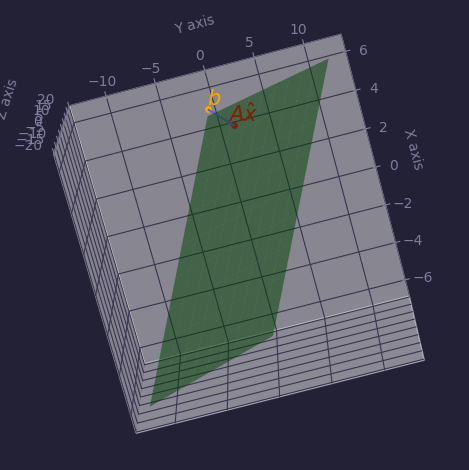

In [8]:
# basis vectors
v1, v2 = A[:,0], A[:,1]
t, u = np.linspace(-6, 6, 10), np.linspace(-6, 6, 10)
T, U = np.meshgrid(t, u)

X = v1[0] * T + v2[0] * U
Y = v1[1] * T + v2[1] * U
Z = v1[2] * T + v2[2] * U
fig, ax = plt.subplots(1, 1, tight_layout = True, subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(X, Y, Z, color='green', alpha=0.5)
ax.scatter(6, 0, 0, color='orange', s = 15)
ax.scatter(5, 2, -1, color='red', s=15)
ax.quiver(6, 0, 0, (5-6), (2-0), (-1-0), color='slateblue')
ax.text(6.2,0,0, s=r'$b$', color='orange', size=15)
ax.text(5.2, 1.5,-0.5, s=r'$A\hat{x}$', color='red', size=15)
ax.view_init(azim=15, elev=-75)
# ax.set_xlim(-6, 6)
# ax.set_ylim(-10, 10)
# ax.set_zlim(-15, 15)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

##### Best Fit Line

Suppose that we have measured three data points **(0, 6), (1, 0), (2, 0)**, and we want to find the best fit line for this points (regression). Note that most of the time the data is non-linear and even if it was linear there are still chances of errors at time of measurement. So finding a unique solution is not possible in most cases and we use least squares to find the solution.
<br><br>Note general equation of a line is $y = Mx + b$ . We intend to find M and b. We subsitute the data points and have followig equations:<br><br>
$
M.0 + B = 6 \\[1em]
M.1 + B = 0 \\[1em]
M.2 + B = 0
$
<br><br>We than put this equations in vector matrix form and observe that this is the same problem solved before. So here we plot (2d) and see results.

To avoid confusion with (x,y) coordinates we use b matrix corresponding to estimated least squares coefficents for sample.

In [9]:
data = np.array([[0,6], [1, 0], [2, 1]])
x, y = data[:,0], data[:,1]
A = np.concat([x, np.ones(data.shape[0])]).reshape(3, -1)
b = np.linalg.inv(A.T@A) @ A.T @ y

print(
    f'Estimated intercept: {b[0]:.4f}',
    f'\nEstimated slope: {b[1]:.4f}',
    f'\nSum of least squares: {np.sum(A@b):.4f}'
)

Estimated intercept: -3.0000 
Estimated slope: 5.3333 
Sum of least squares: 7.0000


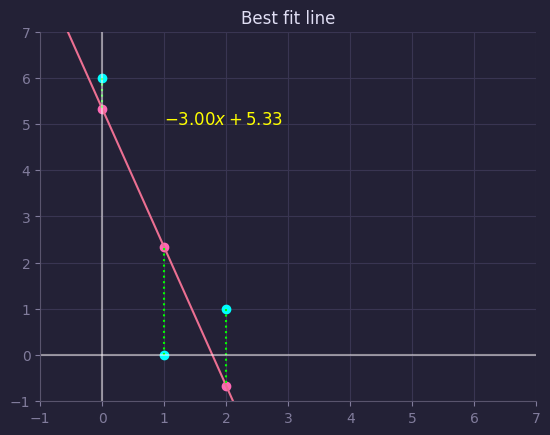

In [10]:
t = np.arange(-1, 4.1, 0.1)
f = np.poly1d(b.reshape(-1))
fig, ax = plt.subplots(1, 1)

ax.plot(t, b[0] * t + b[1])
ax.scatter(x,y, color='cyan')
ax.scatter(x, f(x), color='hotpink')

for i in range(3):
    ax.plot([x[i], x[i]], [y[i], f(x[i])], color='lime', ls=':')
    
ax.text(1, 5, f'${b[0]:.2f}x + {b[1]:.2f}$', size=12, color='yellow')
ax.axhline(0, color = 'snow', alpha=0.5)
ax.axvline(0, color = 'snow', alpha=0.5)
ax.set_title('Best fit line')
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)
ax.grid(True);

Observations:
- The least-squares solution minimizes the sum of the squares of the entries of vector $b - A\hat{x}$
- $b$ is the actual y-values of our data, while $A\hat{x}$ is the y-values on the line. The distance between y-coordinates is equal to $b - A\hat{x}$

##### Best Fit parabola

Trying to find parabola that best approximates the data points : (-1, 0.5), (1, -1), (2, -0.5), (3, 2).<br><br>
We know general equation of a parabola is $y = Bx^2 + Cx + D$ . Expressing following problems as matrices below:

In [11]:
data = np.array([[-1,0.5], [1, -1], [2, -0.5], [3, 2]])
x = data[:,0]
y = data[:,1]
A = np.concat([
    x**2, 
    x, 
    np.ones(len(x)),
], axis=0).reshape(-1, x.shape[0]).T

b = np.linalg.inv(A.T @ A) @ A.T @ y

print(
    f'Estimated least square coefficents: {b}',
    f'\nSum of least squares: {np.sum(A@b):.4f}'
)

Estimated least square coefficents: [ 0.60227273 -0.86136364 -0.93181818] 
Sum of least squares: 1.0000


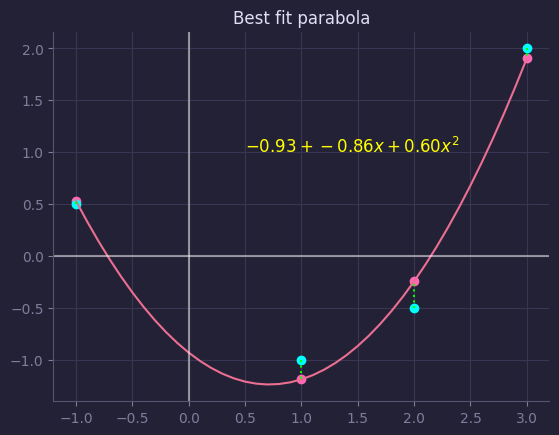

In [12]:
t = np.arange(-1, 3.1, 0.1)
f = np.poly1d(b.reshape(-1))
fig, ax = plt.subplots(1, 1)
ax.plot(t, f(t))
ax.scatter(x, f(x), color='hotpink')
ax.scatter(x, y, color='cyan')

for i in range(4):
    ax.plot([x[i], x[i]], [y[i], f(x[i])], ls=':', color='lime')

ax.text(0.5, 1, f'${b[2]:.2f} + {b[1]:.2f}x + {b[0]:.2f}x^2$', color='yellow', size=12)

ax.axhline(0, color = 'snow', alpha=0.5)
ax.axvline(0, color = 'snow', alpha=0.5)
ax.set_title('Best fit parabola')
ax.grid(True);